# Ревизия 
Что уже обрезано и что еще нет (после ЯП 5, март 2023)

## Сводим данные

In [2]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('/content/Обрезка открыток рабочая таблица для волонтеров 2.xlsx')

In [ ]:
base_1_opencv = pd.read_excel(xls, 'База 1 метод OpenCV')
base_1_opencv['base'] = 1
base_1_rembg = pd.read_excel(xls, 'База 1 метод rembg')
base_1_rembg['base'] = 1
base_1_alg = pd.read_excel(xls, 'База 1 метод algorithm')
base_1_alg['base'] = 1
base_1_alg.head()

In [ ]:
base_2_opencv = pd.read_excel(xls, 'База 2 метод OpenCV')
base_2_opencv['ID'] = base_2_opencv['ID'] + 100000
base_2_opencv['base'] = 2
base_2_rembg = pd.read_excel(xls, 'База 2 метод rembg')
base_2_rembg['ID'] = base_2_rembg['ID'] + 100000
base_2_rembg['base'] = 2
base_2_alg = pd.read_excel(xls, 'База 2 метод algorithm')
base_2_alg['ID'] = base_2_alg['ID'] + 100000
base_2_alg['base'] = 2

In [ ]:
base_2_opencv.dtypes

ID                     int64
Pic                    int64
Комментарий          float64
Название файла        object
Результат обрезки     object
Статус               float64
dtype: object

In [ ]:
base_3_opencv = pd.read_excel(xls, 'База 3 метод OpenCV')
base_3_opencv['ID'] = base_3_opencv['ID'] + 200000
base_3_opencv['base'] = 3
base_3_rembg = pd.read_excel(xls, 'База 3 метод rembg')
base_3_rembg['ID'] = base_3_rembg['ID'] + 200000
base_3_rembg['base'] = 3
base_3_alg = pd.read_excel(xls, 'База 3 метод algorithm')
base_3_alg['ID'] = base_3_alg['ID'] + 200000
base_3_alg['base'] = 3

In [ ]:
base_3_rembg.head()

,ID,Pic,Название файла,Результат обрезки,Статус,Комментарий,base
0,204975,1,4975-1.jpg,4975-1-crop.jpg,NaN,NaN,3
1,204987,1,4987-1.jpg,4987-1-crop.jpg,NaN,NaN,3
2,205016,1,5016-1.jpg,5016-1-crop.jpg,NaN,NaN,3
3,205110,2,5110-2.jpg,5110-2-crop.jpg,NaN,NaN,3
4,205110,1,5110-1.jpg,5110-1-crop.jpg,NaN,NaN,3


In [ ]:
df = pd.concat([
    base_1_opencv, base_1_rembg, base_1_alg,
    base_2_opencv, base_2_rembg, base_2_alg,
    base_3_opencv, base_3_rembg, base_3_alg,
])
df = df[['ID', 'base', 'Pic', 'Название файла', 'Результат обрезки', 'Статус', 'Комментарий']]
df.head()

,ID,base,Pic,Название файла,Результат обрезки,Статус,Комментарий
0,966,1,1,966-1.jpg,1649-1-crop.jpg,NaN,NaN
1,1649,1,1,1649-1.jpg,2102-2-crop.jpg,NaN,NaN
2,2102,1,2,2102-2.jpg,2150-1-crop.jpg,NaN,NaN
3,2150,1,1,2150-1.jpg,2150-2-crop.jpg,NaN,NaN
4,2150,1,2,2150-2.jpg,2180-1-crop.jpg,NaN,NaN


In [ ]:
df.shape

(10519, 7)

## Какие открытки были обрезаны

In [ ]:
df['ID'].nunique()

3088

In [ ]:
ids_cropped = df.groupby('ID')['base'].first().reset_index()
ids_cropped.head()

,ID,base
0,952,1
1,966,1
2,1024,1
3,1649,1
4,2102,1


In [ ]:
ids_cropped['base'].value_counts()

3    2584
2     349
1     155
Name: base, dtype: int64

## Какие открытки требуется обрезать 
Текущее состояние баз

### База 1 --- все уже обрезано

In [ ]:
base_1 = pd.ExcelFile('/content/drive/MyDrive/Системный Блок/пишу тебе/открытки базы/Расшифровка открыток (основная база).xlsx')
base_1 = pd.read_excel(base_1, 'Открытки')
base_1['Номер открытки'] = base_1['Номер открытки'].astype(int)
base_1.head()

,Номер открытки,Pic_url_1,Pic_url_2,Разрешение на публикацию,Источник,Была ли открытка отправлена по почте,"Название коллекции (если вы хотите подпись на сайте). Например, личная коллекция Василия Иванова.","Комментарий или метаинформация. Укажите тут любую метаинформацию про открытку, которую считаете важной. Например, какое-то знание или история, которую нельзя восстановить по тексту открытки.",Заливщик,Разметчик,...,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7,Интересна ли для медиа/исследователей,Почему интересна,Id поста на сайте,Дата заливки,Оценка
0,0,https://forum.vgd.ru/file.php?fid=5476&key=0,0.0,Разрешаю публикацию,Форум VGD,Да,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://forum.vgd.ru/file.php?fid=5491&key=0,NaN,Разрешаю публикацию,Форум VGD,Не знаю,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://forum.vgd.ru/file.php?fid=5492&key=0,0.0,Разрешаю публикацию,Форум VGD,Не знаю,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://forum.vgd.ru/file.php?fid=20890&key=19...,0.0,Разрешаю публикацию,Форум VGD,Не знаю,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://forum.vgd.ru/file.php?fid=20894&key=16...,0.0,Разрешаю публикацию,Форум VGD,Не знаю,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base_1['Проблема'].value_counts()

Отсутствует                         5587
Вотермарка                           962
Большие поля                         155
Низкое качество                       35
Скрыть информацию                     24
Требуется поворот                     20
Нет текста                            14
Две стороны на одном изображении       6
Name: Проблема, dtype: int64

Результатов обрезки должно быть (один результат == 1 скан)

In [132]:
155 * 2

310

### База 2

In [ ]:
base_2 = pd.ExcelFile('/content/drive/MyDrive/Системный Блок/пишу тебе/открытки базы/Расшифровка открыток 2 (Ярмарка проектов).xlsx')
base_2 = pd.read_excel(base_2, 'Открытки')
base_2['Номер открытки'] = base_2['Номер открытки'].astype(int)
base_2.head()

,Номер открытки,Pic_url_1,Pic_url_2,Разрешение на публикацию,Источник,Была ли открытка отправлена по почте,"Название коллекции (если вы хотите подпись на сайте). Например, личная коллекция Василия Иванова.","Комментарий или метаинформация. Укажите тут любую метаинформацию про открытку, которую считаете важной. Например, какое-то знание или история, которую нельзя восстановить по тексту открытки.",Заливщик,Разметчик,...,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7,Интересна ли для медиа/исследователей,Почему интересна,Id поста на сайте,Дата заливки,Оценка
0,100001,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Атрощенко Екатерина (ЯП),...,Письма семье,NaN,NaN,NaN,NaN,NaN,NaN,26789.0,Thu Aug 25 2022 15:04:40 GMT-0400 (Восточная А...,5
1,100002,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Зыкова Мария (ЯП),...,Благодарность в тексте,Поцелуи из писем,Деньги,NaN,NaN,NaN,NaN,26786.0,Thu Aug 25 2022 15:04:40 GMT-0400 (Восточная А...,4
2,100003,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Залян Эдуард (ЯП),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26807.0,Thu Aug 25 2022 15:04:40 GMT-0400 (Восточная А...,5
3,100004,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Никитина Полина (ЯП),...,Загадочная открытка,NaN,NaN,NaN,NaN,NaN,NaN,26788.0,Thu Aug 25 2022 15:04:40 GMT-0400 (Восточная А...,4
4,100005,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Кошкина Мария (ЯП),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26804.0,Thu Aug 25 2022 15:04:40 GMT-0400 (Восточная А...,5


In [ ]:
base_2['Проблема'].value_counts()

Отсутствует                         4488
Большие поля (обе)                   220
Большие поля (лицевая)                84
Низкое качество                       83
Требуется поворот                     33
Нет текста                            15
Большие поля (оборотная)              12
трудный почерк                         2
Две стороны на одном изображении       1
Скрыть информацию                      1
Name: Проблема, dtype: int64

Результатов обрезки должно быть

In [133]:
220 * 2 + 84 + 12

536

### База 3

In [ ]:
base_3 = pd.ExcelFile('/content/drive/MyDrive/Системный Блок/пишу тебе/открытки базы/Расшифровка открыток 3 (Ярмарка проектов).xlsx')
base_3 = pd.read_excel(base_3, 'Открытки')
base_3 = base_3[~base_3['Номер открытки'].isna()]
base_3['Номер открытки'] = base_3['Номер открытки'].astype(int)
base_3.head()

,Номер открытки,Pic_url_1,Pic_url_2,Разрешение на публикацию,Источник,Была ли открытка отправлена по почте,"Название коллекции (если вы хотите подпись на сайте). Например, личная коллекция Василия Иванова.","Комментарий или метаинформация. Укажите тут любую метаинформацию про открытку, которую считаете важной. Например, какое-то знание или история, которую нельзя восстановить по тексту открытки.",Заливщик,Разметчик,...,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7,Интересна ли для медиа/исследователей,Почему интересна,Id поста на сайте,Дата заливки,Оценка
0,205028,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Анна Макарова,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,205096,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Анна Макарова,...,Письма семье,Написано о детях,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,204980,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,"Бачинина Яна (ЯП4, 09-10.22)",...,Социальное,Житейское,Загадочная открытка,NaN,NaN,NaN,NaN,NaN,NaN,5
3,205038,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,"Бачинина Яна (ЯП4, 09-10.22)",...,Письма от семьи,Житейское,Новости,Дурные вести,пасха,NaN,NaN,NaN,NaN,4
4,205073,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,"Бенедиктова Полина (ЯП4, 09-10.22)",...,Просьба,Житейское,Письма отцу,NaN,Из путешествия,NaN,NaN,NaN,NaN,4


In [ ]:
base_3['Проблема'].value_counts()

Отсутствует                         7683
Большие поля (обе)                  2596
Низкое качество                       94
Требуется поворот                     18
Нет текста                            11
Большие поля (оборотная)               4
Обрезать небольшую полоску снизу       1
Большие поля (лицевая)                 1
Скрыть информацию                      1
Две стороны на одном изображении       1
иностранный язык                       1
Name: Проблема, dtype: int64

Результатов обрезки должно быть

In [134]:
2596 * 2 + 4 + 1

5197

# Готово к заливке

In [17]:
xls = pd.ExcelFile('/content/Обрезка открыток рабочая таблица для волонтеров.xlsx')
df = pd.read_excel(xls, 'Рабочая таблица - iter-1 заморо')
df = df.drop(['Исполнитель', 'Исходник ссылка', 'Результат ссылка', 'ID'], axis=1)
df = df.rename(columns={'ID_base': 'ID'})
df['ID'] = df.apply(
    lambda row: row['ID'] if row['base'] == 1
    else row['ID'] + 100000 if row['base'] == 2
    else row['ID'] + 200000,
    axis=1
)
df = df[['ID', 'base', 'Pic', 'crop_method', 
                           'Статус', 'Комментарий',
                           'Исходный файл', 'Результат файл', 
                           'orig_url', 'crop_url']]
df.head()

,ID,base,Pic,crop_method,Статус,Комментарий,Исходный файл,Результат файл,orig_url,crop_url
0,966,1,1,1,Успешно,NaN,966-1.jpg,966-1-crop.jpg,https://drive.google.com/file/d/1K3OGHzPrRrXGK...,https://drive.google.com/file/d/1bSheoBv5eRFy6...
1,1649,1,1,1,Успешно,NaN,1649-1.jpg,1649-1-crop.jpg,https://drive.google.com/file/d/1JytFE-ZFLc-5m...,https://drive.google.com/file/d/1OP7kN7hi53hyi...
2,2102,1,2,1,Успешно,NaN,2102-2.jpg,2102-2-crop.jpg,https://drive.google.com/file/d/1Bo376PzwjDIB3...,https://drive.google.com/file/d/1stSTPt9VAH89H...
3,2150,1,1,1,Провал,NaN,2150-1.jpg,2150-1-crop.jpg,https://drive.google.com/file/d/1RY42_tRcLbfal...,https://drive.google.com/file/d/1ISqwH6Ya9l__3...
4,2150,1,2,1,Успешно,NaN,2150-2.jpg,2150-2-crop.jpg,https://drive.google.com/file/d/1qHJRb7j5epjCA...,https://drive.google.com/file/d/1xQ2nEYMjSm3CH...


Обработка статуса

In [18]:
df['Статус'] = df.apply(
    lambda row: 'Обрезка не требовалась' 
    if row['Статус'] == 'Не знаю' and 
    (row['Комментарий'] == 'Обезка не требовалась'
    # or row['Комментарий'] == 'Не понятно, какая из открыток должна была быть выведена'
     )
    else row['Статус'],
    axis=1
)

In [19]:
df['Статус'] = df['Статус'].apply(
    lambda x: '0 - Успешно' if x == 'Успешно' 
    else '1 - Обрезка не требовалась' if x == 'Обрезка не требовалась'
    else '2 - Провал' if x == 'Провал'
    else '3 - Не знаю' if x == 'Не знаю'
    else '4 - Ожидает проверки'
    )
df['Статус'].value_counts()

4 - Ожидает проверки          8584
0 - Успешно                   1147
2 - Провал                     747
1 - Обрезка не требовалась      41
Name: Статус, dtype: int64

Обработка метода:
* rembg - самая аккуратная обрезка (если сработал успешно)
* OpenCV - второй 
* алгоритм - третий

In [20]:
df['crop_method'] = df['crop_method'].apply(
    lambda x: '0 - rembg' if x == 2
    else '1 - OpenCV' if x == 1
    else '2 - алгоритм' if x == 3
    else x
    )
df['crop_method'].value_counts()

1 - OpenCV      6061
0 - rembg       2229
2 - алгоритм    2229
Name: crop_method, dtype: int64

Отбираем лучший результат для каждого скана (открытка: лицевая + оборотная сторона). Приоритет дается статусу и, во вторую очередь, методу обрезки (см. порядок приоритета выше)

In [52]:
best_result = df.sort_values(by='crop_method').sort_values(by='Статус').groupby(
    ['ID', 'Pic']).first().reset_index()
best_result.head()

,ID,Pic,base,crop_method,Статус,Комментарий,Исходный файл,Результат файл,orig_url,crop_url
0,952,1,1,0 - rembg,0 - Успешно,None,952-1.jpg,952-1-crop.jpg,https://drive.google.com/file/d/18eaZWWYoVCDRp...,https://drive.google.com/file/d/1qe0dBJqGsp_K1...
1,952,2,1,1 - OpenCV,2 - Провал,None,952-2.jpg,952-2-crop.jpg,https://drive.google.com/file/d/1xvRweyDXAgBrR...,https://drive.google.com/file/d/1fqsIlzHGfE0_F...
2,966,1,1,1 - OpenCV,0 - Успешно,None,966-1.jpg,966-1-crop.jpg,https://drive.google.com/file/d/1K3OGHzPrRrXGK...,https://drive.google.com/file/d/1bSheoBv5eRFy6...
3,1024,1,1,1 - OpenCV,2 - Провал,None,1024-1.jpg,1024-1-crop.jpg,https://drive.google.com/file/d/1nEdXKp9xzP69M...,https://drive.google.com/file/d/1kxGnC7x2E24bD...
4,1024,2,1,1 - OpenCV,2 - Провал,None,1024-2.jpg,1024-2-crop.jpg,https://drive.google.com/file/d/11j2grWVDH75-y...,https://drive.google.com/file/d/1HZNWSAtgwVZ6b...


In [53]:
best_result.shape

(6061, 10)

Отбираем сканы, у которых лучшим статусом оказался "Успешно" или "Обрезка не требовалась". Они готовы к заливке

In [54]:
upload_ready = best_result[best_result['Статус'].isin(['0 - Успешно', '1 - Обрезка не требовалась'])]
upload_ready.shape

(1187, 10)

In [55]:
upload_ready['crop_method'].value_counts()

2 - алгоритм    732
1 - OpenCV      291
0 - rembg       164
Name: crop_method, dtype: int64

In [56]:
upload_ready['base'].value_counts()

3    739
1    246
2    202
Name: base, dtype: int64

# Rembg - обрезка прозрачных полей

In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(upload_ready[(upload_ready['Статус'] == '0 - Успешно') & 
                         (upload_ready['crop_method'] == '0 - rembg')])

In [65]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Системный Блок/пишу тебе/обрезка/pictures/База 2/rembg/2316-2-crop.jpg')
cv2_imshow(img)

In [229]:
img.shape

(768, 1024, 3)

In [59]:
def after_crop_rembg(img, color_threshold=5000, margin_gap=5):
  upper_bound = 0
  while True:
    if img[upper_bound, :, 0].sum() > color_threshold or \
    img[upper_bound, :, 1].sum() > color_threshold or \
    img[upper_bound, :, 2].sum() > color_threshold:
      # print(upper_bound)
      break
    else:
      upper_bound += 1
  upper_bound = max(0, upper_bound - margin_gap)

  lower_bound = img.shape[0] - 1
  while True:
    if img[lower_bound, :, 0].sum() > color_threshold or \
    img[lower_bound, :, 1].sum() > color_threshold or \
    img[lower_bound, :, 2].sum() > color_threshold:
      # print(lower_bound)
      break
    else:
      lower_bound -= 1
  lower_bound = min(img.shape[0] - 1, lower_bound + margin_gap)

  left_bound = 0
  while True:
    if img[:, left_bound, 0].sum() > color_threshold or \
    img[:, left_bound, 1].sum() > color_threshold or \
    img[:, left_bound, 2].sum() > color_threshold:
      # print(left_bound)
      break
    else:
      left_bound += 1
  left_bound = max(0, left_bound - margin_gap)

  right_bound = img.shape[1] - 1
  while True:
    if img[:, right_bound, 0].sum() > color_threshold or \
    img[:, right_bound, 1].sum() > color_threshold or \
    img[:, right_bound, 2].sum() > color_threshold:
      # print(right_bound)
      break
    else:
      right_bound -= 1
  right_bound = min(img.shape[1] - 1, right_bound + margin_gap)

  img = img[upper_bound : lower_bound, left_bound : right_bound, :]
  return img

In [226]:
img.shape

(726, 940, 3)

In [262]:
img[:, img.shape[1] - 1, 2].sum()

21028

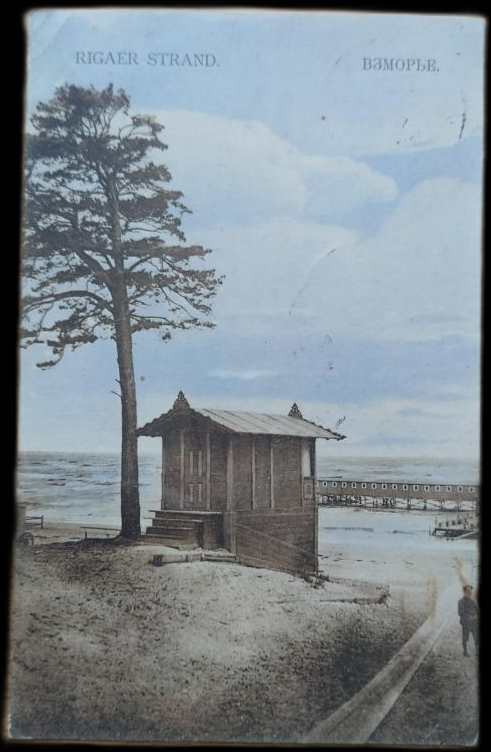

In [269]:
img = after_crop_rembg(img)
cv2_imshow(img)

In [153]:
upper_bound = 0
img[upper_bound, :, 0].any()

False

In [60]:
base_dir = '/content/drive/MyDrive/Системный Блок/пишу тебе/обрезка/pictures'

In [62]:
import numpy as np
from tqdm import tqdm

In [ ]:
upload_ready['rembg_after_crop'] = np.nan

In [67]:
for ind, row in tqdm(upload_ready.iterrows(), total=upload_ready.shape[0]):
  if row['crop_method'] == '0 - rembg':
    crop_path = f"{base_dir}/База {row['base']}/crop-rembg/{row['Результат файл']}"
    # print(crop_path)
    img = cv2.imread(crop_path)
    img = after_crop_rembg(img)
    after_crop_path = f"{base_dir}/rembg-after-crop/{row['ID']}-{row['Pic']}-rembg-after-crop.jpg"
    # print(after_crop_path)
    cv2.imwrite(after_crop_path, img)
    upload_ready.loc[ind, 'rembg_after_crop'] = f"{row['ID']}-{row['Pic']}-rembg-after-crop.jpg"
    # break

100%|██████████| 1187/1187 [03:24<00:00,  5.81it/s]


In [68]:
upload_ready.to_csv('/content/drive/MyDrive/Системный Блок/пишу тебе/обрезка/upload_ready_iter_1.csv')

# Анализ результатов обрезки

## Автоматическая валидация обрезки OpenCV

Восстановим, какие сканы были успешно обрезаны OpenCV в соответствии с автоматической проверкой результата

In [3]:
xls = pd.ExcelFile('/content/Обрезка открыток метаинформация.xlsx')

In [5]:
xls.sheet_names

['База 1 cut-success',
 'База 1 cut-fail',
 'База 2 cut-success',
 'База 2 cut-fail',
 'База 3 cut-success',
 'База 3 cut-fail']

In [7]:
base_1_opencv_success = pd.read_excel(xls, 'База 1 cut-success')
base_1_opencv_success['base'] = 1
base_1_opencv_success['opencv_status_auto'] = 'success'

base_1_opencv_fail = pd.read_excel(xls, 'База 1 cut-fail')
base_1_opencv_fail['base'] = 1
base_1_opencv_fail['opencv_status_auto'] = 'fail'

base_2_opencv_success = pd.read_excel(xls, 'База 2 cut-success')
base_2_opencv_success['base'] = 2
base_2_opencv_success['ID'] = base_2_opencv_success['ID'] + 100000
base_2_opencv_success['opencv_status_auto'] = 'success'

base_2_opencv_fail = pd.read_excel(xls, 'База 2 cut-fail')
base_2_opencv_fail['base'] = 2
base_2_opencv_fail['ID'] = base_2_opencv_fail['ID'] + 100000
base_2_opencv_fail['opencv_status_auto'] = 'fail'

base_3_opencv_success = pd.read_excel(xls, 'База 3 cut-success')
base_3_opencv_success['base'] = 3
base_3_opencv_success['ID'] = base_3_opencv_success['ID'] + 200000
base_3_opencv_success['opencv_status_auto'] = 'success'

base_3_opencv_fail = pd.read_excel(xls, 'База 3 cut-fail')
base_3_opencv_fail['base'] = 3
base_3_opencv_fail['ID'] = base_3_opencv_fail['ID'] + 200000
base_3_opencv_fail['opencv_status_auto'] = 'fail'

opencv_status_auto_df = pd.concat([
    base_1_opencv_success[['ID', 'Pic', 'base', 'opencv_status_auto']],
    base_1_opencv_fail[['ID', 'Pic', 'base', 'opencv_status_auto']],
    base_2_opencv_success[['ID', 'Pic', 'base', 'opencv_status_auto']],
    base_2_opencv_fail[['ID', 'Pic', 'base', 'opencv_status_auto']],
    base_3_opencv_success[['ID', 'Pic', 'base', 'opencv_status_auto']],
    base_3_opencv_fail[['ID', 'Pic', 'base', 'opencv_status_auto']],
])
opencv_status_auto_df.head()

,ID,Pic,base,opencv_status_auto
0,966,1,1,success
1,1649,1,1,success
2,2102,2,1,success
3,2150,1,1,success
4,2150,2,1,success


Статистика: на 6061 примере 63% автоматически классифицированы как успешная обрезка и 37% - как провальная

In [10]:
opencv_status_auto_df.shape

(6061, 4)

In [9]:
opencv_status_auto_df['opencv_status_auto'].value_counts(normalize=True)

success    0.632239
fail       0.367761
Name: opencv_status_auto, dtype: float64

## OpenCV-success - ручная валидация
Сколько из этих 63% действительно были обрезаны удачно?

Соединяем таблицу с автоматическими статусами и таблицу с ручной разметкой

In [21]:
df = df.merge(opencv_status_auto_df, on=['ID', 'Pic', 'base'], how='left')
df.shape

(10519, 11)

In [22]:
df.head()

,ID,base,Pic,crop_method,Статус,Комментарий,Исходный файл,Результат файл,orig_url,crop_url,opencv_status_auto
0,966,1,1,1 - OpenCV,0 - Успешно,NaN,966-1.jpg,966-1-crop.jpg,https://drive.google.com/file/d/1K3OGHzPrRrXGK...,https://drive.google.com/file/d/1bSheoBv5eRFy6...,success
1,1649,1,1,1 - OpenCV,0 - Успешно,NaN,1649-1.jpg,1649-1-crop.jpg,https://drive.google.com/file/d/1JytFE-ZFLc-5m...,https://drive.google.com/file/d/1OP7kN7hi53hyi...,success
2,2102,1,2,1 - OpenCV,0 - Успешно,NaN,2102-2.jpg,2102-2-crop.jpg,https://drive.google.com/file/d/1Bo376PzwjDIB3...,https://drive.google.com/file/d/1stSTPt9VAH89H...,success
3,2150,1,1,1 - OpenCV,2 - Провал,NaN,2150-1.jpg,2150-1-crop.jpg,https://drive.google.com/file/d/1RY42_tRcLbfal...,https://drive.google.com/file/d/1ISqwH6Ya9l__3...,success
4,2150,1,2,1 - OpenCV,0 - Успешно,NaN,2150-2.jpg,2150-2-crop.jpg,https://drive.google.com/file/d/1qHJRb7j5epjCA...,https://drive.google.com/file/d/1xQ2nEYMjSm3CH...,success


Статистика: на 338 примерах 
* ручная валидация подтвердила успешность 85% результатов, автоматически классифицированных как успешные
* остальные 15%, автоматически классифицированных как успешные, на самом деле оказались неудачными

In [37]:
df[
    (df['crop_method'] == '1 - OpenCV') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал'])) &
   (df['opencv_status_auto'] == 'success')
   ].shape

(338, 11)

In [38]:
df[(df['crop_method'] == '1 - OpenCV') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал'])) &
   (df['opencv_status_auto'] == 'success')
   ].groupby(['opencv_status_auto'])['Статус'].value_counts(normalize=True)

opencv_status_auto  Статус     
success             0 - Успешно    0.852071
                    2 - Провал     0.147929
Name: Статус, dtype: float64

## OpenCV-fail - ручная валидация

При этом, если автоматически результат был классифицирован как провальный, он в самом деле провальный с точностью 99% (218 примеров)

In [43]:
df[(df['crop_method'] == '1 - OpenCV') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал'])) &
   (df['opencv_status_auto'] == 'fail')
   ].shape

(218, 11)

In [41]:
df[(df['crop_method'] == '1 - OpenCV') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал'])) &
   (df['opencv_status_auto'] == 'fail')
   ].groupby(['opencv_status_auto'])['Статус'].value_counts(normalize=True)

opencv_status_auto  Статус     
fail                2 - Провал     0.990826
                    0 - Успешно    0.009174
Name: Статус, dtype: float64

## Алгоритм Ильи Т - ручная валидация
Насколько успешен алгоритмический подход?

На 1031 примере 67% успешно, 33% - провал

In [39]:
df[(df['crop_method'] == '2 - алгоритм') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал']))
   ].shape

(1031, 11)

In [40]:
df[(df['crop_method'] == '2 - алгоритм') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал']))
   ]['Статус'].value_counts(normalize=True)

0 - Успешно    0.672163
2 - Провал     0.327837
Name: Статус, dtype: float64

## rembg - ручная валидация
Насколько успешен rembg?

На 307 примерах 53% успешно, 47% - провал

In [44]:
df[(df['crop_method'] == '0 - rembg') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал']))
   ].shape

(307, 11)

In [45]:
df[(df['crop_method'] == '0 - rembg') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал']))
   ]['Статус'].value_counts(normalize=True)

0 - Успешно    0.534202
2 - Провал     0.465798
Name: Статус, dtype: float64

## Обрезка лицевой и оборотной стороны

In [49]:
opencv_status_auto_df.groupby('Pic')['opencv_status_auto'].value_counts(normalize=True)

Pic  opencv_status_auto
1    success               0.597585
     fail                  0.402415
2    success               0.667668
     fail                  0.332332
Name: opencv_status_auto, dtype: float64

In [46]:
df[(df['crop_method'] == '1 - OpenCV') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал']))
   ].groupby(['opencv_status_auto', 'Pic'])['Статус'].value_counts(normalize=True)

opencv_status_auto  Pic  Статус     
fail                1    2 - Провал     1.000000
                    2    2 - Провал     0.980583
                         0 - Успешно    0.019417
success             1    0 - Успешно    0.891566
                         2 - Провал     0.108434
                    2    0 - Успешно    0.813953
                         2 - Провал     0.186047
Name: Статус, dtype: float64

In [47]:
df[(df['crop_method'] == '2 - алгоритм') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал']))
   ].groupby('Pic')['Статус'].value_counts(normalize=True)

Pic  Статус     
1    0 - Успешно    0.814882
     2 - Провал     0.185118
2    0 - Успешно    0.508333
     2 - Провал     0.491667
Name: Статус, dtype: float64

In [48]:
df[(df['crop_method'] == '0 - rembg') & 
   (df['Статус'].isin(['0 - Успешно', '2 - Провал']))
   ].groupby('Pic')['Статус'].value_counts(normalize=True)

Pic  Статус     
1    2 - Провал     0.570755
     0 - Успешно    0.429245
2    0 - Успешно    0.768421
     2 - Провал     0.231579
Name: Статус, dtype: float64

# Заливка результатов обрезки